<a href="https://colab.research.google.com/github/marinafebiyola/ATS-MACHINE-VISION/blob/main/ATS_Machine_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape dataset asli: (88800, 785)
Total data balancing: 13000
0
1     500
2     500
3     500
4     500
5     500
6     500
7     500
8     500
9     500
10    500
11    500
12    500
13    500
14    500
15    500
16    500
17    500
18    500
19    500
20    500
21    500
22    500
23    500
24    500
25    500
26    500
Name: count, dtype: int64
Shape fitur HOG: (13000, 144)

Mulai proses LOOCV demo (200 data)...


100%|██████████| 200/200 [00:01<00:00, 104.41it/s]
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== HASIL EVALUASI LOOCV ===
Accuracy : 0.2850
Precision: 0.1412
Recall   : 0.2084
F1-Score : 0.1561


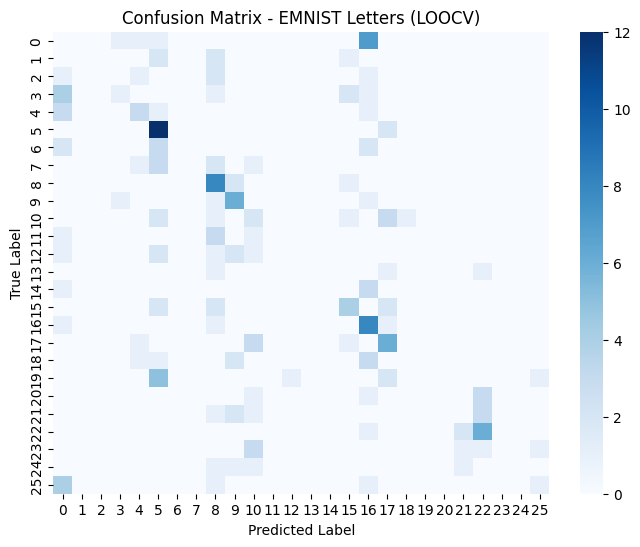


Ekstraksi HOG dengan {'orientations': 12, 'pixels_per_cell': (4, 4), 'cells_per_block': (3, 3)}
  SVM params: {'C': 50, 'gamma': 0.001}
    Accuracy: 0.5950
  SVM params: {'C': 100, 'gamma': 0.001}
    Accuracy: 0.6000
  SVM params: {'C': 100, 'gamma': 0.0005}
    Accuracy: 0.5950

Ekstraksi HOG dengan {'orientations': 12, 'pixels_per_cell': (4, 4), 'cells_per_block': (2, 2)}
  SVM params: {'C': 50, 'gamma': 0.001}
    Accuracy: 0.6000
  SVM params: {'C': 100, 'gamma': 0.001}
    Accuracy: 0.6100
  SVM params: {'C': 100, 'gamma': 0.0005}
    Accuracy: 0.6000

Ekstraksi HOG dengan {'orientations': 18, 'pixels_per_cell': (4, 4), 'cells_per_block': (2, 2)}
  SVM params: {'C': 50, 'gamma': 0.001}
    Accuracy: 0.5650
  SVM params: {'C': 100, 'gamma': 0.001}
    Accuracy: 0.5650
  SVM params: {'C': 100, 'gamma': 0.0005}
    Accuracy: 0.5750

=== Kombinasi Terbaik ===
HOG params: {'orientations': 12, 'pixels_per_cell': (4, 4), 'cells_per_block': (2, 2)}
SVM params: {'C': 100, 'gamma': 0.001

In [ ]:

# ===========================================================
# HANDWRITTEN LETTER CLASSIFICATION USING EMNIST
#Using HOG Feature Extraction and Support Vector Machine (SVM)
#Evaluation with Leave-One-Out Cross Validation (LOOCV)
# ===========================================================

# Nama  : MARINA FEBIYOLA BR TARIGAN
# NIM   : 4212301021
# Kelas : MK5A PAGI

# ===========================================================
# 1️⃣ Import Library
# ===========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.feature import hog
from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)
from sklearn.utils import shuffle
from tqdm import tqdm

# ===========================================================
# 2️⃣ Load Dataset
# ===========================================================
df_train = pd.read_csv('emnist-letters-train.csv', header=None)
print("Shape dataset asli:", df_train.shape)

# ===========================================================
# 3️⃣ Sampling 13.000 Data (500 per kelas)
# ===========================================================
samples_per_class = 500
balanced_df = pd.concat([
    df_train[df_train[0] == class_id].sample(samples_per_class, random_state=42)
    for class_id in range(1, 27)
])

print("Total data balancing:", len(balanced_df))
print(balanced_df[0].value_counts())

# ===========================================================
# Data Preparation
# ===========================================================
y = balanced_df.iloc[:, 0].values  # Label (1–26)
X = balanced_df.iloc[:, 1:].values / 255.0  # Normalisasi
X_images = X.reshape(-1, 28, 28)  # Reshape jadi gambar 28x28

# ===========================================================
# 5️⃣ HOG Feature Extraction
# ===========================================================
def extract_hog_features(images, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2)):
    """Fungsi ekstraksi fitur HOG"""
    features = []
    for img in images:
        fd = hog(img,
                 orientations=orientations,
                 pixels_per_cell=pixels_per_cell,
                 cells_per_block=cells_per_block,
                 block_norm='L2-Hys',
                 transform_sqrt=True,
                 visualize=False)
        features.append(fd)
    return np.array(features)

X_hog = extract_hog_features(X_images)
print("Shape fitur HOG:", X_hog.shape)

# ===========================================================
# 6️⃣ Classification using SVM + LOOCV
# ===========================================================
svm_model = SVC(kernel='rbf', C=10, gamma=0.01)

# gunakan subset kecil untuk demo di Colab
print("\nMulai proses LOOCV demo (200 data)...")
X_data, y_data = shuffle(X_hog, y, random_state=42)
X_data = X_data[:200]
y_data = y_data[:200]

loo = LeaveOneOut()
y_true, y_pred = [], []

for train_idx, test_idx in tqdm(loo.split(X_data), total=len(X_data)):
    X_train, X_test = X_data[train_idx], X_data[test_idx]
    y_train, y_test = y_data[train_idx], y_data[test_idx]
    svm_model.fit(X_train, y_train)
    pred = svm_model.predict(X_test)
    y_true.append(y_test[0])
    y_pred.append(pred[0])

# ===========================================================
# 7️⃣ Model Evaluation
# ===========================================================
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='macro')
rec = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print("\n=== HASIL EVALUASI LOOCV ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-Score : {f1:.4f}")

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, cmap='Blues')
plt.title('Confusion Matrix - EMNIST Letters (LOOCV)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ===========================================================
# 8️⃣ HOG and SVM Parameter Tuning
# ===========================================================
subset_size = 200
X_data, y_data = shuffle(X_images, y, random_state=42)
X_data = X_data[:subset_size]
y_data = y_data[:subset_size]

hog_params_list = [
    {'orientations': 12, 'pixels_per_cell': (4,4), 'cells_per_block': (3,3)},
    {'orientations': 12, 'pixels_per_cell': (4,4), 'cells_per_block': (2,2)},
    {'orientations': 18, 'pixels_per_cell': (4,4), 'cells_per_block': (2,2)},
]

svm_params_list = [
    {'C': 50, 'gamma': 0.001},
    {'C': 100, 'gamma': 0.001},
    {'C': 100, 'gamma': 0.0005},
]

best_acc = 0
best_combo = {}

for h_params in hog_params_list:
    print(f"\nEkstraksi HOG dengan {h_params}")
    X_hog = extract_hog_features(X_data, **h_params)

    for s_params in svm_params_list:
        print(f"  SVM params: {s_params}")
        svm_model = SVC(kernel='rbf', **s_params)
        loo = LeaveOneOut()
        y_true, y_pred = [], []

        for train_idx, test_idx in loo.split(X_hog):
            X_train, X_test = X_hog[train_idx], X_hog[test_idx]
            y_train, y_test = y_data[train_idx], y_data[test_idx]
            svm_model.fit(X_train, y_train)
            pred = svm_model.predict(X_test)
            y_true.append(y_test[0])
            y_pred.append(pred[0])

        acc = accuracy_score(y_true, y_pred)
        print(f"    Accuracy: {acc:.4f}")

        if acc > best_acc:
            best_acc = acc
            best_combo = {'hog': h_params, 'svm': s_params}

print("\n=== Kombinasi Terbaik ===")
print("HOG params:", best_combo['hog'])
print("SVM params:", best_combo['svm'])
print(f"Best Accuracy: {best_acc:.4f}")
